In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
alpha_vantage_api_key = 'MTWZDSBS2FG3C1U1'

In [13]:
#Intraday data Alpha Vantage
from alpha_vantage.timeseries import TimeSeries
alpha_vantage_api_key = 'MTWZDSBS2FG3C1U1'
def pull_intraday_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name, data_interval = '15min'):
    """
        data_interval: String. Desired data interval for the data. Can be '1min', '5min', '15min', '30min', '60min'.   
    """
    #Generate Alpha Vantage time series object
    ts = TimeSeries(key = alpha_vantage_api_key, output_format = 'pandas')
    #Retrieve the data for the past sixty days (outputsize = full)
    data, meta_data = ts.get_intraday(ticker_name, outputsize = 'full', interval= data_interval)
    data['date_time'] = data.index
    return data, meta_data

#Daily Alpha Vantage
def pull_daily_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name, output_size = "full"):
    """
    Pull daily time series by stock ticker name.
    Args:
        output_size: Str. Can be "full" or "compact". If "compact", then the past 100 days of data
        is returned. If "full" the complete time series is returned (could be 20 years' worth of data!)
    """
    #Generate Alpha Vantage time series object
    ts = TimeSeries(key = alpha_vantage_api_key, output_format = 'pandas')
    data, meta_data = ts.get_daily_adjusted(ticker_name, outputsize = output_size)
    data['date_time'] = data.index
    return data, meta_data


In [ ]:
#pulling code
# ts_data, ts_metadata = pull_intraday_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name = "GOOGL")
# ts_data, ts_metadata = pull_daily_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name = "BRK.B", output_size = "compact")

In [33]:
#max 5 calls per minute
tickers = ['GOOGL','AAPL','MSFT','AMZN','FB']
data=pd.DataFrame()
for tick in tickers:
    x,y = pull_daily_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name = tick, output_size = "compact")
    data[tick]=x['5. adjusted close']

In [35]:
#next ones
tickers2 =['TSLA','BRK.B','JPM','JNJ']
for tick in tickers2:
    x,y = pull_daily_time_series_alpha_vantage(alpha_vantage_api_key, ticker_name = tick, output_size = "compact")
    data[tick]=x['5. adjusted close']

In [36]:
data

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,BRK.B,JPM,JNJ
date,,,,,,,,,
2021-04-27,2290.98,134.390000,261.970000,3417.43,303.57,704.74,273.65,151.250000,163.180000
2021-04-26,2309.93,134.720000,261.550000,3409.00,303.04,738.20,270.86,150.560000,164.120000
2021-04-23,2299.93,134.320000,261.150000,3340.88,301.13,729.40,271.98,150.190000,165.520000
2021-04-22,2252.52,131.940000,257.170000,3309.04,296.52,719.69,269.51,147.370000,165.180000
2021-04-21,2278.35,133.500000,260.580000,3362.02,301.47,744.12,272.21,150.540000,166.590000
...,...,...,...,...,...,...,...,...,...
2020-12-08,1811.33,124.193836,215.515779,3177.29,283.40,649.88,228.19,120.426825,150.610256
2020-12-07,1817.03,123.564779,213.799714,3158.00,285.58,641.76,229.24,120.308372,148.046254
2020-12-04,1823.76,122.067024,213.869554,3162.58,279.70,599.04,231.35,120.762440,149.338193


In [ ]:
**************** USING YAHOO*************

In [161]:
#using Yahoo
tickers = ['GOOGL','AAPL','MSFT','AMZN','FB','TSLA','JPM','JNJ','^GSPC']
data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t,data_source='yahoo',start='2016-01-01')['Adj Close']

In [121]:
returns= data.pct_change()
returns

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,JPM,JNJ,^GSPC
Date,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.002752,-0.025059,0.004562,-0.005024,0.004989,0.000090,0.001729,0.004180,0.002012
2016-01-06,-0.002889,-0.019570,-0.018165,-0.001799,0.002336,-0.019648,-0.014436,-0.005055,-0.013115
2016-01-07,-0.024140,-0.042205,-0.034783,-0.039058,-0.049043,-0.015477,-0.040439,-0.011654,-0.023700
2016-01-08,-0.013617,0.005288,0.003067,-0.001464,-0.006025,-0.021563,-0.022399,-0.010683,-0.010838
...,...,...,...,...,...,...,...,...,...
2021-04-21,-0.000290,0.002930,0.008983,0.008196,-0.003899,0.034952,0.008508,0.000661,0.009306
2021-04-22,-0.011337,-0.011685,-0.013086,-0.015758,-0.016420,-0.032831,-0.021058,-0.008464,-0.009211
2021-04-23,0.021047,0.018039,0.015476,0.009622,0.015547,0.013492,0.019136,0.002058,0.010929


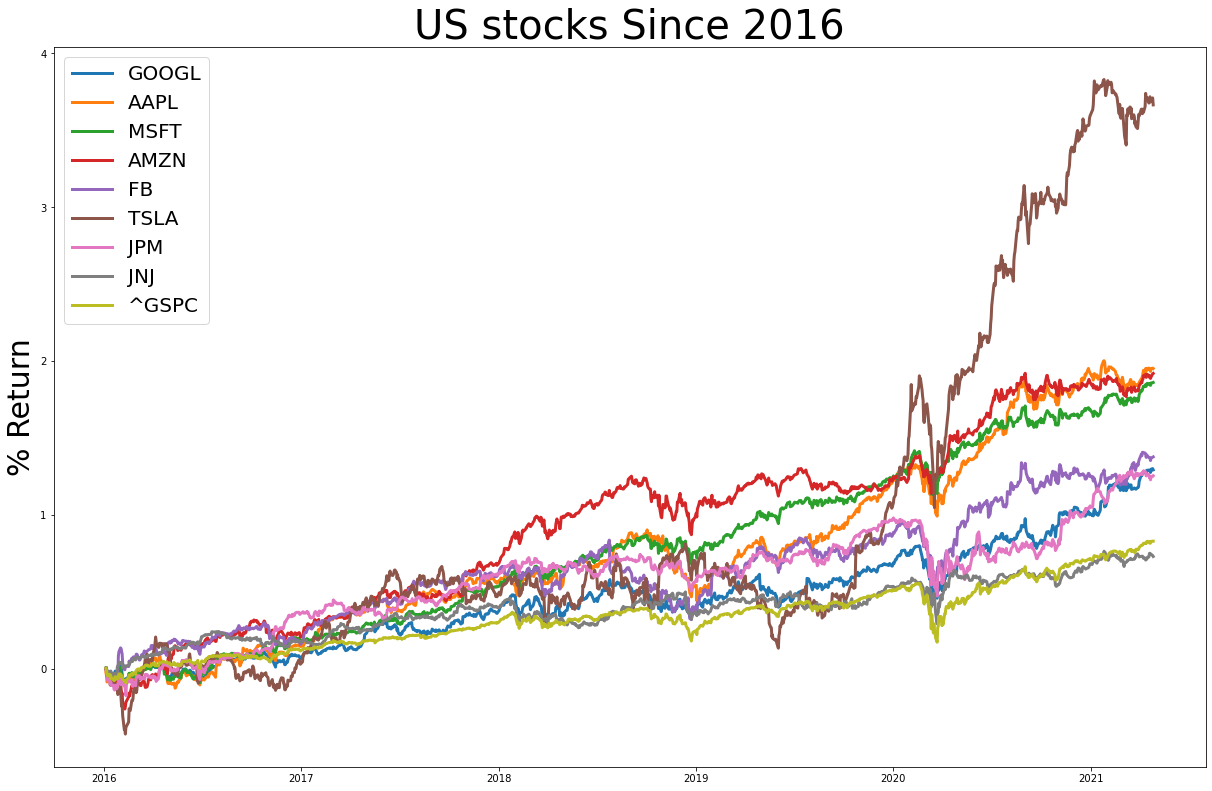

In [167]:
fig=plt.figure(figsize=(16,10))
axes=fig.add_axes([0,0,1,1])
axes.plot(returns.cumsum(),lw=3)
axes.set_title('US stocks Since 2016',fontsize=40)
axes.set_ylabel('% Return',fontsize=30)
axes.legend(tickers,fontsize=20)

In [125]:
#Variance of returns
var=returns.var()
var

GOOGL    0.000281
AAPL     0.000362
MSFT     0.000301
AMZN     0.000358
FB       0.000428
TSLA     0.001360
JPM      0.000361
JNJ      0.000154
^GSPC    0.000143
dtype: float64

In [127]:
#variance covariance matrix
covariance= returns.cov()
covariance

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,JPM,JNJ,^GSPC
GOOGL,0.000281,0.000206,0.000226,0.000209,0.000239,0.000225,0.000150,0.000089,0.000152
AAPL,0.000206,0.000362,0.000236,0.000217,0.000231,0.000281,0.000161,0.000096,0.000170
MSFT,0.000226,0.000236,0.000301,0.000226,0.000227,0.000264,0.000166,0.000106,0.000172
AMZN,0.000209,0.000217,0.000226,0.000358,0.000246,0.000261,0.000096,0.000069,0.000135
FB,0.000239,0.000231,0.000227,0.000246,0.000428,0.000252,0.000137,0.000081,0.000155
TSLA,0.000225,0.000281,0.000264,0.000261,0.000252,0.001360,0.000169,0.000070,0.000188
JPM,0.000150,0.000161,0.000166,0.000096,0.000137,0.000169,0.000361,0.000102,0.000174
JNJ,0.000089,0.000096,0.000106,0.000069,0.000081,0.000070,0.000102,0.000154,0.000093
^GSPC,0.000152,0.000170,0.000172,0.000135,0.000155,0.000188,0.000174,0.000093,0.000143


In [128]:
#covariance with SP500
covar=pd.DataFrame()
for i in ['GOOGL','AAPL','MSFT','AMZN','FB','TSLA','JPM','JNJ']:
    covar[i] = [(covariance[i]['^GSPC'])]
covar

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,JPM,JNJ
0,0.000152,0.00017,0.000172,0.000135,0.000155,0.000188,0.000174,0.000093


In [129]:
#betas
betas = covar/var['^GSPC']
betas

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,JPM,JNJ
0,1.0648,1.186624,1.198225,0.942407,1.082619,1.309776,1.215784,0.652993


In [152]:
#Beta expected returns
betaret=pd.DataFrame()
for i in ['GOOGL','AAPL','MSFT','AMZN','FB','TSLA','JPM','JNJ']:
    betaret[i] = returns['^GSPC'].mul(betas[i][0])
betaret

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,JPM,JNJ
Date,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.002143,0.002388,0.002411,0.001896,0.002178,0.002636,0.002446,0.001314
2016-01-06,-0.013965,-0.015563,-0.015715,-0.012360,-0.014199,-0.017178,-0.015945,-0.008564
2016-01-07,-0.025236,-0.028124,-0.028398,-0.022335,-0.025659,-0.031042,-0.028815,-0.015476
2016-01-08,-0.011541,-0.012861,-0.012987,-0.010214,-0.011734,-0.014196,-0.013177,-0.007077
...,...,...,...,...,...,...,...,...
2021-04-21,0.009909,0.011043,0.011151,0.008770,0.010075,0.012189,0.011314,0.006077
2021-04-22,-0.009808,-0.010930,-0.011036,-0.008680,-0.009972,-0.012064,-0.011198,-0.006014
2021-04-23,0.011637,0.012968,0.013095,0.010299,0.011832,0.014314,0.013287,0.007136


In [164]:
#Beta Adjusted Returns
betaadj = returns[['GOOGL','AAPL','MSFT','AMZN','FB','TSLA','JPM','JNJ']]-betaret
betaadj

,GOOGL,AAPL,MSFT,AMZN,FB,TSLA,JPM,JNJ
Date,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000609,-0.027447,0.002151,-0.006920,0.002811,-0.002546,-0.000718,0.002866
2016-01-06,0.011076,-0.004007,-0.002450,0.010561,0.016535,-0.002470,0.001510,0.003510
2016-01-07,0.001096,-0.014081,-0.006384,-0.016723,-0.023385,0.015566,-0.011625,0.003822
2016-01-08,-0.002076,0.018149,0.016054,0.008750,0.005709,-0.007367,-0.009222,-0.003606
...,...,...,...,...,...,...,...,...
2021-04-21,-0.010199,-0.008113,-0.002168,-0.000574,-0.013974,0.022763,-0.002806,-0.005416
2021-04-22,-0.001530,-0.000756,-0.002050,-0.007078,-0.006448,-0.020767,-0.009859,-0.002449
2021-04-23,0.009411,0.005070,0.002381,-0.000677,0.003715,-0.000822,0.005849,-0.005078


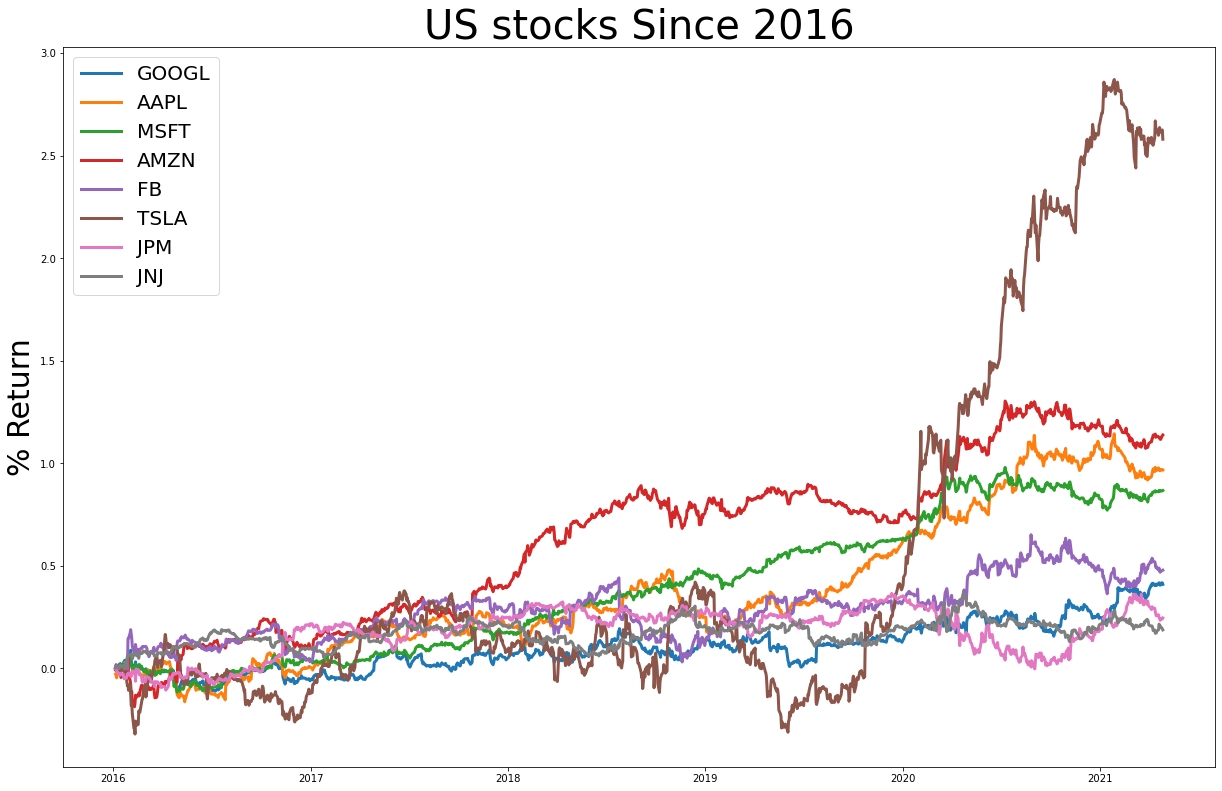

In [166]:
fig=plt.figure(figsize=(16,10))
axes=fig.add_axes([0,0,1,1])
axes.plot(betaadj.cumsum(),lw=3)
axes.set_title('US stocks Since 2016',fontsize=40)
axes.set_ylabel('% Return',fontsize=30)
axes.legend(betaadj.columns,fontsize=20)